# Imports

In [1]:
import pandas #No alias because it's better for me to remember
import numpy
import matplotlib.pyplot as plt
from scipy import stats

# Loading the data

In [2]:
evDataFrame = pandas.read_csv('evdataset.csv')

# Getting to know the data

## Initial Data info

In [3]:
evDataFrame

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,1252,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,445,340,390,670,440,540,5.7,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,1534,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,440,320,380,660,415,520,7.9,...,55,570,4261,1809,1568,2771,2300,447,385,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1116,Porsche,https://ev-database.org/car/1116/Porsche-Tayca...,390,290,340,560,370,450,2.8,...,45,980,4963,1966,1378,2900,2870,575,366,4
190,1533,Volkswagen,https://ev-database.org/car/1533/Volkswagen-ID...,440,320,380,660,415,515,7.9,...,55,570,4261,1809,1568,2771,2280,420,385,4
191,1547,Citroen,https://ev-database.org/car/1547/Citroen-e-Ber...,210,140,170,295,170,220,11.7,...,27,310,4753,1921,1849,2975,2440,639,806,7
192,1492,Audi,https://ev-database.org/car/1492/Audi-Q4-Sport...,395,290,340,580,370,460,6.2,...,49,500,4588,1865,1614,2764,2715,575,535,5


In [4]:
evDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           194 non-null    int64  
 1   Make                         194 non-null    object 
 2   link                         194 non-null    object 
 3   City - Cold Weather          194 non-null    int64  
 4   Highway - Cold Weather       194 non-null    int64  
 5   Combined - Cold Weather      194 non-null    int64  
 6   City - Mild Weather          194 non-null    int64  
 7   Highway - Mild Weather       194 non-null    int64  
 8   Combined - Mild Weather      194 non-null    int64  
 9   Acceleration 0 - 100 km/h    194 non-null    float64
 10  Top Speed                    194 non-null    int64  
 11  Electric Range               194 non-null    int64  
 12  Total Power                  194 non-null    int64  
 13  Total Torque        

In [5]:
evDataFrame.describe()

,id,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,1526.257732,343.247423,247.500000,293.144330,502.706186,315.721649,393.608247,7.870619,177.015464,345.592784,...,44.396907,528.711340,4702.087629,1880.061856,1620.706186,2899.829897,2633.139175,619.257732,507.190722,5.536082
std,154.958947,92.173078,75.553656,84.558652,138.297461,98.967440,117.054175,3.168385,38.110213,101.384377,...,15.617918,256.219808,378.219208,68.719346,152.249425,238.567154,415.592250,199.938995,192.411664,1.530768
min,1116.000000,135.000000,95.000000,115.000000,210.000000,125.000000,160.000000,2.800000,125.000000,135.000000,...,24.000000,150.000000,3631.000000,1622.000000,1378.000000,2322.000000,1300.000000,245.000000,171.000000,4.000000
25%,1437.250000,280.000000,185.000000,230.000000,395.000000,230.000000,295.000000,5.400000,150.000000,265.000000,...,34.000000,312.500000,4469.750000,1837.000000,1519.750000,2764.000000,2310.000000,497.000000,405.000000,5.000000
50%,1557.500000,350.000000,250.000000,300.000000,515.000000,320.000000,400.000000,7.400000,160.000000,352.500000,...,46.000000,470.000000,4694.000000,1887.000000,1614.000000,2900.000000,2660.000000,572.500000,472.500000,5.000000
75%,1648.750000,403.750000,295.000000,345.000000,595.000000,375.000000,470.000000,9.650000,200.000000,410.000000,...,51.750000,650.000000,4959.000000,1920.750000,1652.000000,3082.500000,2968.750000,645.000000,558.250000,5.000000
max,1757.000000,595.000000,470.000000,535.000000,895.000000,615.000000,740.000000,19.100000,261.000000,640.000000,...,110.000000,1170.000000,5391.000000,2011.000000,1927.000000,3430.000000,3500.000000,1121.000000,1410.000000,9.000000


In [6]:
columnList = evDataFrame.columns.to_list()
columnList

['id',
 'Make',
 'link',
 'City - Cold Weather',
 'Highway - Cold Weather',
 'Combined - Cold Weather',
 'City - Mild Weather',
 'Highway - Mild Weather',
 'Combined - Mild Weather',
 'Acceleration 0 - 100 km/h',
 'Top Speed',
 'Electric Range',
 'Total Power',
 'Total Torque',
 'Drive',
 'Battery Capacity',
 'Charge Power',
 'Charge Speed',
 'Fastcharge Speed',
 'Length',
 'Width',
 'Height',
 'Wheelbase',
 'Gross Vehicle Weight (GVWR)',
 'Max. Payload',
 'Cargo Volume',
 'Seats']

## Checking to see if there's any weird values
We don't need to check to see if the link has any unique values because it won't be necessary for the exploratory data analysis

In [7]:
evDataFrame.select_dtypes('object').columns.to_list()


['Make', 'link', 'Drive']

In [8]:
evDataFrame['Make'].unique()

array(['Genesis', 'Mercedes', 'Porsche', 'BMW', 'Volkswagen', 'CUPRA',
       'Skoda', 'MG', 'Volvo', 'Fiat', 'Smart', 'Hyundai', 'Peugeot',
       'Citroen', 'Audi', 'Polestar', 'Toyota', 'Kia', 'DS', 'Ford',
       'Honda', 'JAC', 'Nissan', 'Renault', 'Opel', 'Hongqi', 'Lexus',
       'Dacia', 'Mazda', 'Seres', 'Tesla', 'Jaguar', 'Mini', 'Subaru'],
      dtype=object)

In [9]:
evDataFrame['Drive'].unique()

array(['Rear', 'AWD', 'Front'], dtype=object)

## Checking to see how clean the data is

In [10]:
#Checking for dupliates
evDataFrame.duplicated().sum()

0

In [11]:
#Checking for null values
evDataFrame.isnull().sum()

id                             0
Make                           0
link                           0
City - Cold Weather            0
Highway - Cold Weather         0
Combined - Cold Weather        0
City - Mild Weather            0
Highway - Mild Weather         0
Combined - Mild Weather        0
Acceleration 0 - 100 km/h      0
Top Speed                      0
Electric Range                 0
Total Power                    0
Total Torque                   0
Drive                          0
Battery Capacity               0
Charge Power                   0
Charge Speed                   0
Fastcharge Speed               0
Length                         0
Width                          0
Height                         0
Wheelbase                      0
Gross Vehicle Weight (GVWR)    0
Max. Payload                   0
Cargo Volume                   0
Seats                          0
dtype: int64

# Data Cleaning

In [12]:
#Adding measure and units
for column in columnList:
    if 'Weather' in column:
        evDataFrame.rename(columns={column:column+' (km)'}, inplace=True)
    else:
        continue
evDataFrame.columns.to_list()

['id',
 'Make',
 'link',
 'City - Cold Weather (km)',
 'Highway - Cold Weather (km)',
 'Combined - Cold Weather (km)',
 'City - Mild Weather (km)',
 'Highway - Mild Weather (km)',
 'Combined - Mild Weather (km)',
 'Acceleration 0 - 100 km/h',
 'Top Speed',
 'Electric Range',
 'Total Power',
 'Total Torque',
 'Drive',
 'Battery Capacity',
 'Charge Power',
 'Charge Speed',
 'Fastcharge Speed',
 'Length',
 'Width',
 'Height',
 'Wheelbase',
 'Gross Vehicle Weight (GVWR)',
 'Max. Payload',
 'Cargo Volume',
 'Seats']

In [13]:
evDataFrame.rename(columns={
    'Charge Power':'Charge Power (kW Ac)',
    'Charge Speed':'Charge Speed (km/h)',
    'Electric Range':'Electric Range (km)',
    'Total Power':'Total Power (kW)',
    'Total Torque':'Total Torque (Nm)',
    'Fastcharge Speed':'FastCharge Speed (km/h)',
    'Length':'Length (mm)',
    'Width':'Width (mm)',
    'Height':'Height (mm)',
    'Wheelbase':'Wheelbase (mm)',
    'Gross Vehicle Weight (GVWR)':'Gross Vehicle Weight GVWR (kg)',
    'Max. Payload': 'Max. Payload (kg)',
    'Cargo Volume':'Cargo Volume (L)',
    'Top Speed':'Top Speed (km/h)',
    'Acceleration 0 - 100 km/h':'Acceleration 0 - 100 km/h (sec)',
    'Battery Capacity':'Battery Capacity (kWh)'
},inplace=True)
evDataFrame.columns.to_list()

['id',
 'Make',
 'link',
 'City - Cold Weather (km)',
 'Highway - Cold Weather (km)',
 'Combined - Cold Weather (km)',
 'City - Mild Weather (km)',
 'Highway - Mild Weather (km)',
 'Combined - Mild Weather (km)',
 'Acceleration 0 - 100 km/h (sec)',
 'Top Speed (km/h)',
 'Electric Range (km)',
 'Total Power (kW)',
 'Total Torque (Nm)',
 'Drive',
 'Battery Capacity (kWh)',
 'Charge Power (kW Ac)',
 'Charge Speed (km/h)',
 'FastCharge Speed (km/h)',
 'Length (mm)',
 'Width (mm)',
 'Height (mm)',
 'Wheelbase (mm)',
 'Gross Vehicle Weight GVWR (kg)',
 'Max. Payload (kg)',
 'Cargo Volume (L)',
 'Seats']

# Decision analysis

## Make against Battery capacity

In [14]:
makeAgainstBattery = evDataFrame.groupby('Make')['Battery Capacity (kWh)'].mean()
makeAgainstBatteryRank = makeAgainstBattery.rank(ascending=False)
makeAgainstBatteryRank.rename('Rank',inplace=True)
makeAgainstBattery = pandas.concat([makeAgainstBattery,makeAgainstBatteryRank], axis='columns')
makeAgainstBattery.sort_values('Rank',ascending=True, inplace=True)
print(makeAgainstBattery)

            Battery Capacity (kWh)  Rank
Make                                    
Mercedes                 96.545833   1.0
Ford                     92.128571   2.0
Hongqi                   91.500000   3.0
Porsche                  90.244444   4.0
BMW                      90.050000   5.0
Jaguar                   90.000000   6.0
Tesla                    82.000000   7.0
Audi                     81.925000   8.0
Polestar                 78.000000   9.0
Genesis                  77.400000  10.0
Volkswagen               76.307692  11.0
Subaru                   75.000000  12.0
Skoda                    74.000000  13.0
Volvo                    73.500000  14.0
Toyota                   68.750000  15.0
Kia                      66.700000  16.0
Smart                    66.000000  17.0
CUPRA                    65.250000  18.0
Hyundai                  64.460000  19.0
Nissan                   62.000000  20.0
MG                       61.237500  21.0
Citroen                  59.090909  22.0
Opel            

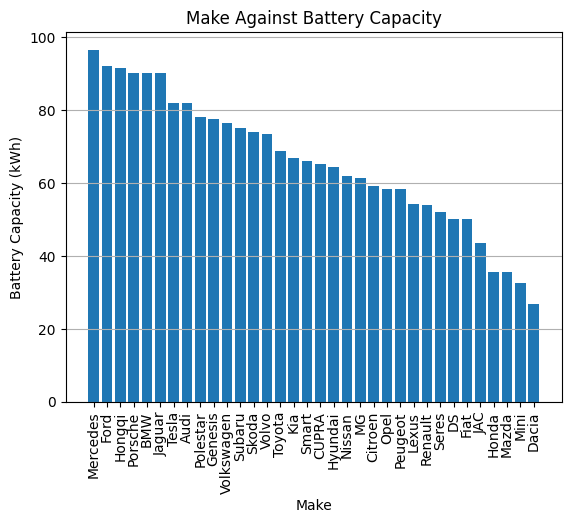

In [15]:
plt.bar(makeAgainstBattery.index,makeAgainstBattery['Battery Capacity (kWh)'])
plt.xticks(rotation=90)
plt.grid(visible=True,axis='y')
plt.title('Make Against Battery Capacity')
plt.xlabel('Make')
plt.ylabel('Battery Capacity (kWh)')
plt.show()

## Make against Real Range Estimation

In [16]:
makeAgainstRealRange = evDataFrame.groupby('Make')[[
    'City - Cold Weather (km)',
    'Highway - Cold Weather (km)',
    'Combined - Cold Weather (km)',
    'City - Mild Weather (km)',
    'Highway - Mild Weather (km)',
    'Combined - Mild Weather (km)'
]].mean()
makeAgainstRealRange = pandas.concat([makeAgainstRealRange,makeAgainstRealRange.mean(axis=1).rank(ascending=False).rename('Rank')],axis=1)
makeAgainstRealRange.sort_values('Rank',inplace=True)
makeAgainstRealRange

,City - Cold Weather (km),Highway - Cold Weather (km),Combined - Cold Weather (km),City - Mild Weather (km),Highway - Mild Weather (km),Combined - Mild Weather (km),Rank
Make,,,,,,,
Mercedes,442.083333,330.833333,385.000000,648.750000,424.375000,520.625000,1.0
Tesla,430.000000,323.750000,375.000000,651.250000,420.000000,518.750000,2.0
BMW,426.875000,316.875000,370.000000,624.375000,405.625000,498.750000,3.0
Porsche,402.222222,303.055556,352.500000,588.333333,388.888889,474.166667,4.0
Ford,415.000000,295.000000,351.428571,599.285714,372.857143,466.428571,5.0
Polestar,402.500000,295.000000,347.500000,595.000000,382.500000,472.500000,6.0
Volkswagen,381.923077,276.923077,327.692308,565.384615,355.000000,442.307692,7.0
Skoda,376.000000,277.000000,325.000000,560.000000,356.000000,444.000000,8.0
Jaguar,390.000000,275.000000,325.000000,555.000000,345.000000,430.000000,9.0


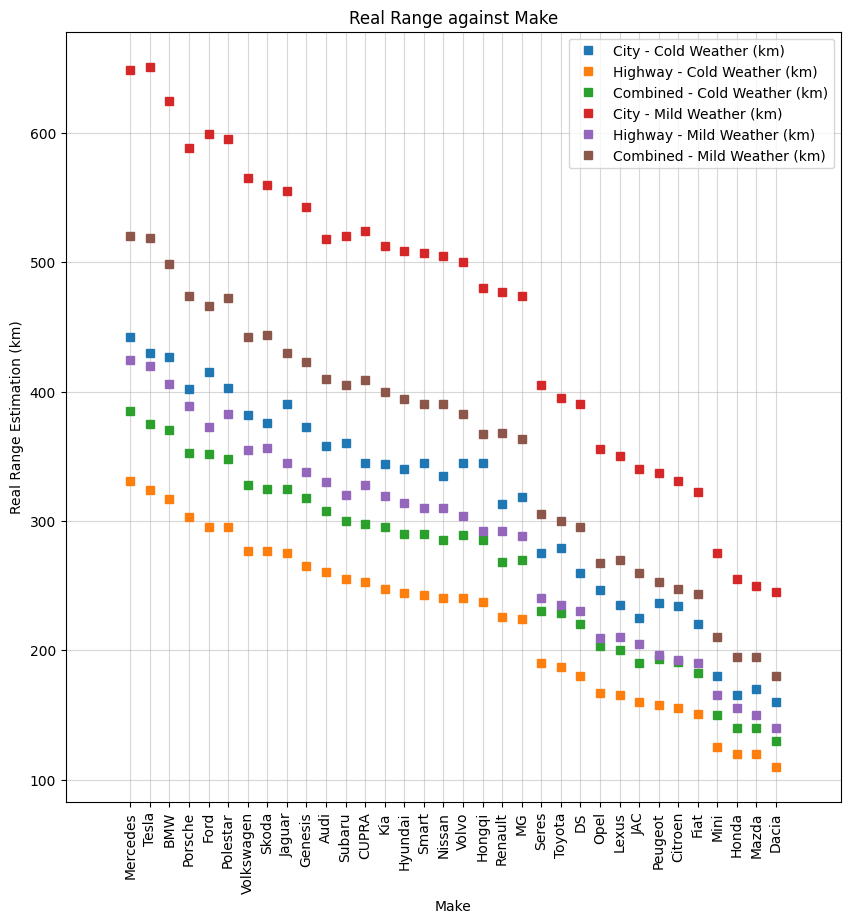

In [17]:
data = {}
for row in makeAgainstRealRange.index.to_list():
    data[row] = makeAgainstRealRange.loc[row].drop('Rank').to_list()

plt.figure(figsize=(10,10))
plt.plot(list(data.keys()),list(data.values()),marker='s',linestyle='')
plt.xticks(rotation=90)
plt.grid(visible=True,alpha=0.5)
plt.xlabel('Make')
plt.ylabel('Real Range Estimation (km)')
plt.title('Real Range against Make')
plt.legend(makeAgainstRealRange.columns.to_list())
plt.margins(x=0.1)

plt.show()

## Other variable Correlation with Battery Capacity

### Battery Capacity against Top Speed

In [18]:
def correlation(X,y):
    slope, intercept, r_value, p_value, stderr = stats.linregress(X,y)
    return intercept + slope*X

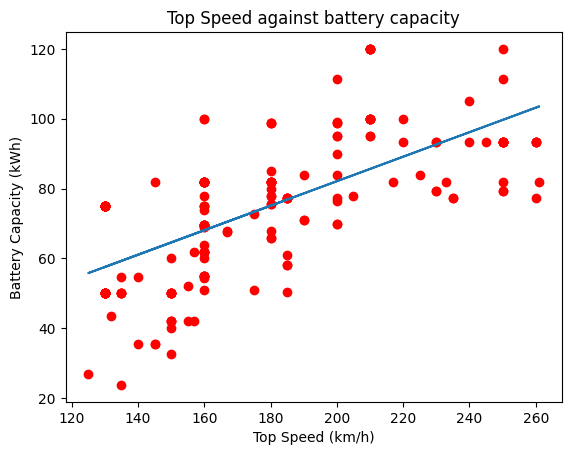

In [19]:
topSpeed = evDataFrame['Top Speed (km/h)']
batteryCapacity = evDataFrame['Battery Capacity (kWh)']
plt.scatter(topSpeed,batteryCapacity, color='red')
plt.plot(topSpeed,correlation(topSpeed,batteryCapacity))
plt.xlabel('Top Speed (km/h)')
plt.ylabel('Battery Capacity (kWh)')
plt.title('Top Speed against battery capacity')
plt.show()

We can see that top speed Strongly correlates with Battery Capacity. This may be useful when finding the model we want to use.

### Battery Capacity against Charging Power

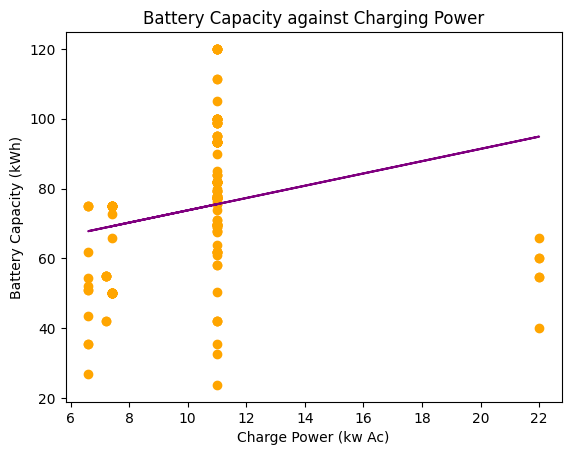

In [20]:
chargingPower = evDataFrame['Charge Power (kW Ac)']
plt.scatter(chargingPower,batteryCapacity, color='orange')
plt.plot(chargingPower,correlation(chargingPower,batteryCapacity),color='purple')
plt.title('Battery Capacity against Charging Power')
plt.xlabel('Charge Power (kw Ac)')
plt.ylabel('Battery Capacity (kWh)')
plt.show()

This shows that the Battery Capacity correlates by a small amount with charge Power. This also will be usefull with picking the model

### Battery Capacity against Gross Vehicle weight.
We don't yet know how Vehicle weight affects Performance, similar to top speed, so it would be good if we could use this data point to see if it affects the battery capacity.

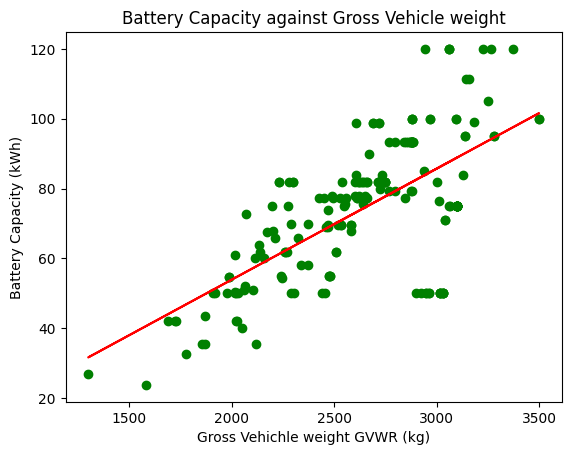

In [21]:
vehicleWeight = evDataFrame['Gross Vehicle Weight GVWR (kg)']
plt.scatter(vehicleWeight,batteryCapacity, color='green')
plt.plot(vehicleWeight,correlation(vehicleWeight,batteryCapacity),color='red')
plt.title('Battery Capacity against Gross Vehicle weight')
plt.xlabel('Gross Vehichle weight GVWR (kg)')
plt.ylabel('Battery Capacity (kWh)')
plt.show()


As weight increases so does battery capacity, meaning battery capcatiy directly correlates to weight.

## Real Range against Weight

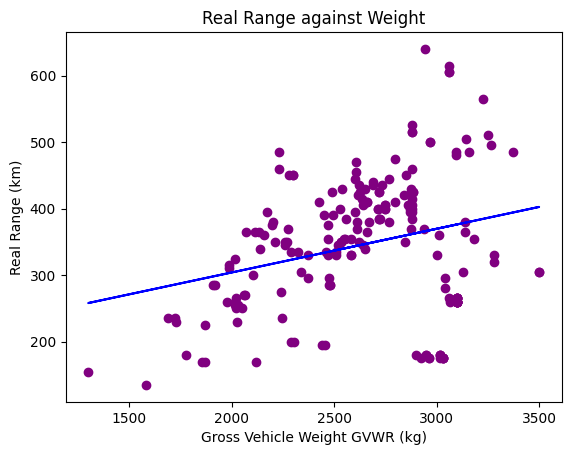

In [22]:
realRange = evDataFrame['Electric Range (km)']
plt.scatter(vehicleWeight,realRange, color='purple')
plt.plot(vehicleWeight,correlation(vehicleWeight,realRange), color='blue')
plt.title('Real Range against Weight')
plt.xlabel('Gross Vehicle Weight GVWR (kg)')
plt.ylabel('Real Range (km)')
plt.show()

# Choosing the model

The best model to choose should be:
- A Mercedes since a Mercedes car is the best car when it comes to range and Battery capacity.
- Of the remaining cars we could filter out the car with the most range and battery capacity.

In [23]:
mercedesDataFrame = evDataFrame[evDataFrame['Make'] == 'Mercedes'].reset_index()
mercedesDataFrame.sort_values(['Electric Range (km)','Battery Capacity (kWh)'], ascending=False, inplace=True)
mercedesDataFrame

,index,id,Make,link,City - Cold Weather (km),Highway - Cold Weather (km),Combined - Cold Weather (km),City - Mild Weather (km),Highway - Mild Weather (km),Combined - Mild Weather (km),...,Charge Speed (km/h),FastCharge Speed (km/h),Length (mm),Width (mm),Height (mm),Wheelbase (mm),Gross Vehicle Weight GVWR (kg),Max. Payload (kg),Cargo Volume (L),Seats
20,155,1483,Mercedes,https://ev-database.org/car/1483/Mercedes-EQS-...,595,470,535,895,615,740,...,56,960,5216,1926,1512,3210,2945,540,610,5
23,178,1699,Mercedes,https://ev-database.org/car/1699/Mercedes-EQS-...,575,450,515,855,585,705,...,53,920,5216,1926,1512,3210,3060,520,610,5
2,32,1484,Mercedes,https://ev-database.org/car/1484/Mercedes-EQS-...,570,450,510,850,585,700,...,52,900,5216,1926,1512,3210,3060,550,610,5
10,68,1700,Mercedes,https://ev-database.org/car/1700/Mercedes-EQS-...,570,445,510,845,580,700,...,52,900,5216,1926,1512,3210,3060,520,610,5
6,50,1537,Mercedes,https://ev-database.org/car/1537/Mercedes-EQS-...,535,415,475,785,530,645,...,49,840,5223,1926,1518,3210,3225,645,610,5
16,108,1538,Mercedes,https://ev-database.org/car/1538/Mercedes-EQE-...,500,385,440,745,500,605,...,54,780,4946,1906,1492,3120,2880,600,430,5
15,99,1713,Mercedes,https://ev-database.org/car/1713/Mercedes-EQE-300,485,375,430,730,485,590,...,54,650,4946,1906,1492,3120,2880,570,430,5
19,145,1714,Mercedes,https://ev-database.org/car/1714/Mercedes-EQE-350,485,375,430,730,485,590,...,54,650,4946,1906,1492,3120,2880,570,430,5
8,64,1715,Mercedes,https://ev-database.org/car/1715/Mercedes-EQE-...,480,365,420,710,470,575,...,52,750,4946,1906,1492,3120,2970,580,430,5
12,84,1716,Mercedes,https://ev-database.org/car/1716/Mercedes-EQE-...,475,365,420,705,470,575,...,52,750,4946,1906,1492,3120,2970,570,430,5


We see that the model with the ID 1483 is at the top of the list when Real Range is the priority